<a href="https://colab.research.google.com/github/angieolonan03/CCINFOM_DBMS/blob/main/CSINTSY_MCO1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install modules

In [ ]:
!pip install networkx
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 683.2/683.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.3/341.3 kB 26.2 MB/s eta 0:00:00


**BFS Algorithm**

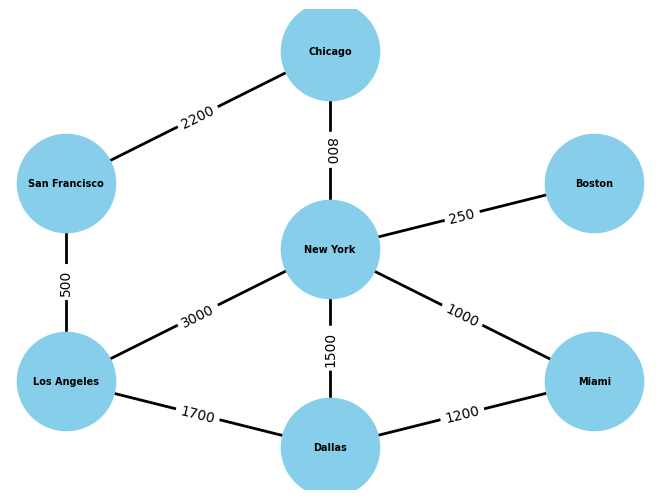

0 - Boston
1 - Chicago
2 - Dallas
3 - Los Angeles
4 - Miami
5 - New York
6 - San Francisco
What is the starting destination?: 4
What is the end goal?: 6
Path found:
Miami
Dallas
Los Angeles
San Francisco


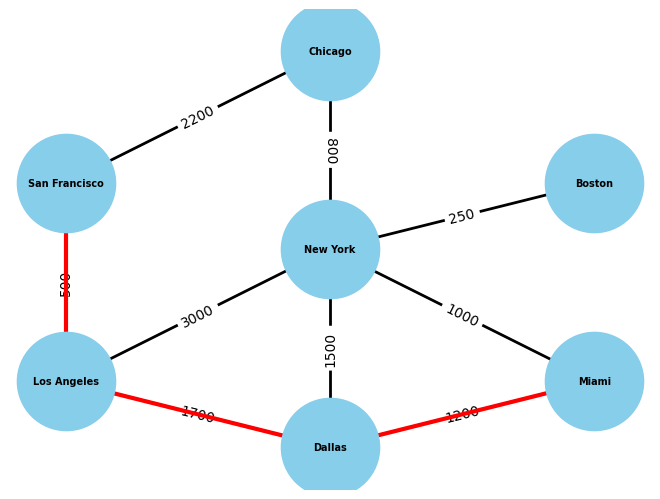


Algorithm Analysis:
Time Complexity: O(7 + 3)
Memory Complexity: O(7)


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# locations and their positions for plotting
loc_positions = {
    'Boston': (2, 3),
    'Chicago': (1, 5),
    'Dallas': (1, -1),
    'Los Angeles': (0, 0),
    'Miami': (2, 0),
    'New York': (1, 2),
    'San Francisco': (0, 3)
}

# adjacency list
al = [
    [0, 0, 0, 0, 0, 250, 0],       # Boston
    [0, 0, 0, 0, 0, 800, 2200],    # Chicago
    [0, 0, 0, 1700, 1200, 1500, 0],# Dallas
    [0, 0, 1700, 0, 0, 3000, 500], # Los Angeles
    [0, 0, 1200, 0, 0, 1000, 0],   # Miami
    [250, 800, 1500, 3000, 1000, 0, 0], # New York
    [0, 2200, 0, 500, 0, 0, 0]     # San Francisco
]

# Create graph
G = nx.Graph()

# add nodes with positions
for node in loc_positions:
    G.add_node(node, pos=loc_positions[node])

# add edges
for i, node1 in enumerate(loc_positions):
    for j, node2 in enumerate(loc_positions):
        if al[i][j] != 0:
            G.add_edge(node1, node2, weight=al[i][j])

# display graph
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=7, font_color='black', font_weight='bold', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

# asking for inputs
for i, node in enumerate(loc_positions):
    print(f"{i} - {node}")
start = int(input('What is the starting destination?: '))
goal = int(input('What is the end goal?: '))

# BFS Algorithm
queuepos = 1 # adds to queue after start
queue = [start, None, None, None, None, None, None]
parent = [None, None, None, None, None, None, None]
parent[start] = -1 # since the parent array doubles as a visited array,
                    # set placeholder value for start

for i in queue:                             # go through each node in queue
    for j in range(0, 7):                   # check values of other nodes
        if al[i][j] and parent[j] is None:  # if node is adjacent & not visited
            queue[queuepos] = j
            queuepos += 1
            parent[j] = i

parent[start] = None  # remove placeholder

pathpos = 0
path = [None, None, None, None, None, None, None]

curr = goal
while parent[curr] != None:
    path[pathpos] = curr
    pathpos += 1
    curr = parent[curr]

path[pathpos] = start

print('Path found:')
path_nodes = []
while pathpos >= 0:
    path_nodes.append(list(loc_positions.keys())[path[pathpos]])
    pathpos -= 1

for node in path_nodes:
    print(node)

# plotting the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=7, font_color='black', font_weight='bold', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
path_edges = list(zip(path_nodes, path_nodes[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=3)

plt.show()

#time complexity & memory complexity
def bfs_info():
    n = len(loc_positions)  #number of nodes
    e = sum([sum(row) > 0 for row in al]) // 2  #number of edges (undirected graph)

    #time complexity
    time_complexity = f"O({n} + {e})"

    #memory complexity
    memory_complexity = f"O({n})"

    return time_complexity, memory_complexity

time_complexity, memory_complexity = bfs_info()

print("\nAlgorithm Analysis:")
print(f"Time Complexity: {time_complexity}")
print(f"Memory Complexity: {memory_complexity}")

**A* Algorithm**

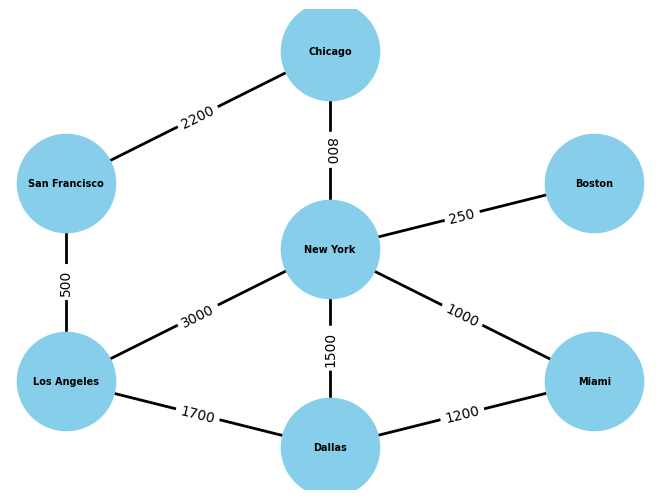

Available locations:
0 = Boston
1 = Chicago
2 = Dallas
3 = Los Angeles
4 = Miami
5 = New York
6 = San Francisco
Enter the starting destination: 2
Enter the end goal: 1
Path found: ['Dallas', 'New York', 'Chicago']


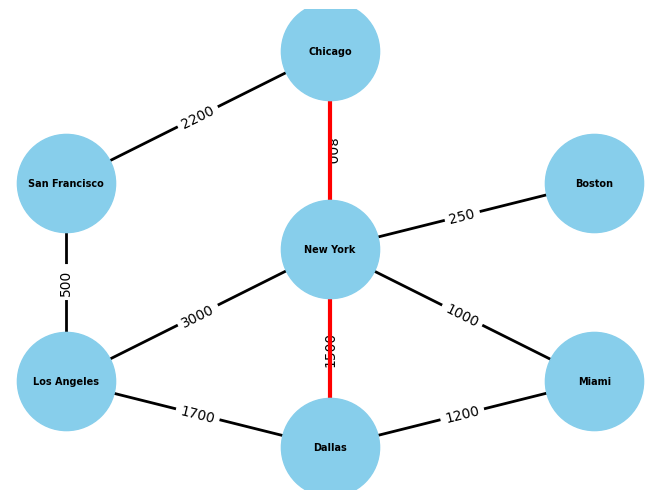


Algorithm Analysis:
Time Complexity: O(7 + 3)
Memory Complexity: O(7)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Locations and their positions for plotting
loc_positions = {
    'Boston': (2, 3),
    'Chicago': (1, 5),
    'Dallas': (1, -1),
    'Los Angeles': (0, 0),
    'Miami': (2, 0),
    'New York': (1, 2),
    'San Francisco': (0, 3)
}

# Define the undirected graph
Graph_nodes = {
    'Boston': [('New York', 250)],
    'Chicago': [('New York', 800), ('San Francisco', 2200)],
    'Dallas': [('Miami', 1200), ('Los Angeles', 1700), ('New York', 1500)],
    'Los Angeles': [('San Francisco', 500), ('New York', 3000), ('Dallas', 1700)],
    'Miami': [('New York', 1000), ('Dallas', 1200)],
    'New York': [('Boston', 250), ('Chicago', 800), ('Los Angeles', 3000), ('Dallas', 1500), ('Miami', 1000)],
    'San Francisco': [('Chicago', 2200), ('Los Angeles', 500)]
}

loc_list = list(Graph_nodes.keys())
al = [[0] * len(loc_list) for _ in range(len(loc_list))]

for node, edges in Graph_nodes.items():
    for edge in edges:
        i = loc_list.index(node)
        j = loc_list.index(edge[0])
        al[i][j] = 1
        al[j][i] = 1  # since it's an undirected graph

# Create a graph
G = nx.Graph()

# Add nodes with positions
for node, pos in loc_positions.items():
    G.add_node(node, pos=pos)

# Add edges with weights
for node, neighbors in Graph_nodes.items():
    for neighbor, weight in neighbors:
        G.add_edge(node, neighbor, weight=weight)

# Plotting the graph
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_edge_attributes(G, 'weight')

nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=7, font_color='black', font_weight='bold', width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

# A* Search Algorithm
def aStarSearch(start, goal):
    open_set = set([start])
    closed_set = set()

    cost = {start: 0}
    parent_nodes = {start: start}

    while open_set:
        n = None

        # Search for node with the lowest f(v) = cost + heuristic
        for v in open_set:
            if n is None or cost[v] + heuristic(v) < cost[n] + heuristic(n):
                n = v

        if n is None:
            print('A path to this goal does not exist.')
            return None

        if n == goal:
            path = []

            while parent_nodes[n] != n:
                path.append(n)
                n = parent_nodes[n]
            path.append(start)

            path.reverse()

            print('Path found: {}'.format(path))
            return path

        open_set.remove(n)
        closed_set.add(n)

        # Search neighbor m of node n
        for (m, weight) in get_neighbors(n):
            if m not in open_set and m not in closed_set:
                open_set.add(m)  # add m to the open set
                parent_nodes[m] = n  # set n as its parent
                cost[m] = cost[n] + weight  # set/update cost
            else:
                if cost[m] > cost[n] + weight:  # else if m is in open set with larger cost
                    cost[m] = cost[n] + weight
                    parent_nodes[m] = n

                    if m in closed_set:
                        closed_set.remove(m)
                        open_set.add(m)  # add to open set for re-evaluation

    print('A path to this goal does not exist.')
    return None

# Returns the neighboring nodes and their corresponding distances
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return []

# A dictionary containing the heuristic values
def heuristic(n):
    H_value = {
        'Miami': 2000,
        'New York': 800,
        'Boston': 900,
        'Dallas': 1200,
        'San Francisco': 2200,
        'Los Angeles': 2400,
        'Chicago': 0,
    }
    return H_value.get(n, float('inf'))

print("Available locations:")
for i, location in enumerate(Graph_nodes.keys()):
    print(f"{i} = {location}")

# Get user input
start_index = int(input('Enter the starting destination: '))
goal_index = int(input('Enter the end goal: '))

# Get city names based on indices
locations = list(Graph_nodes.keys())
start_city = locations[start_index]
goal_city = locations[goal_index]

# Call function
path = aStarSearch(start_city, goal_city)

if path:
    # Highlight the found path
    path_edges = list(zip(path, path[1:]))
    nx.draw(G, pos, with_labels=True, node_size=5000, node_color='skyblue', font_size=7, font_color='black', font_weight='bold', width=2)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=3)

    plt.show()

    #time complexity & memory complexity
def bfs_info():
    n = len(loc_positions)  #number of nodes
    e = sum([sum(row) > 0 for row in al]) // 2  #number of edges (undirected graph)

    #time complexity
    time_complexity = f"O({n} + {e})"

    #memory complexity
    memory_complexity = f"O({n})"

    return time_complexity, memory_complexity

time_complexity, memory_complexity = bfs_info()

print("\nAlgorithm Analysis:")
print(f"Time Complexity: {time_complexity}")
print(f"Memory Complexity: {memory_complexity}")